### 10.2.1 加载住房数据

In [5]:
import pandas as pd
import os 
os.chdir(r"D:\360MoveData\Users\86138\Desktop\myself\刷过的书\python_机器学习")
df = pd.read_csv("house.data.txt", header=None, sep="\s+")

In [6]:
df.columns = ["CRIM", "ZN", 'INDUS', 'CHAS', 'NOX', "RM", "AGE", "DIS", "RAD", 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 可视化数据集的重要特点

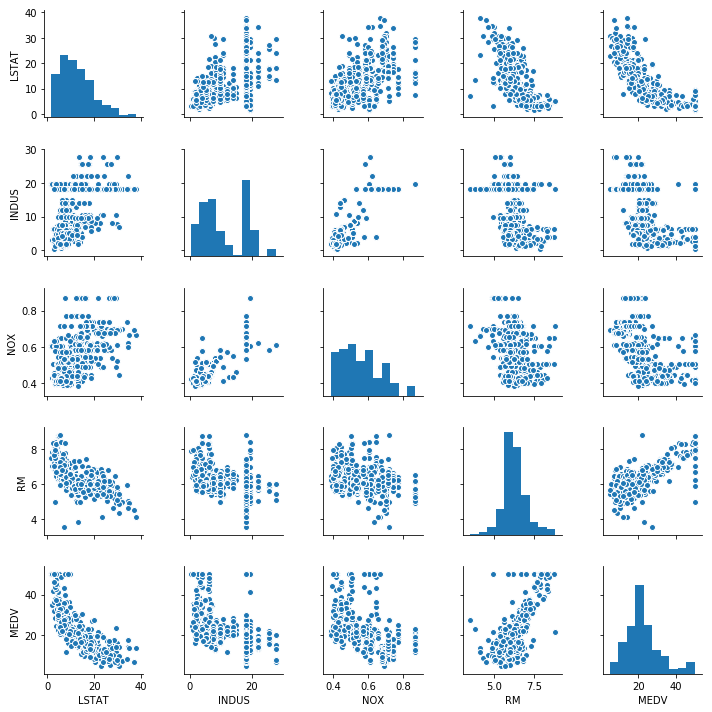

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2)
plt.tight_layout() # 自动紧凑
plt.show()

### 用关联矩阵查看关系

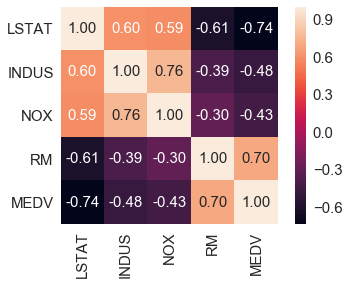

In [16]:
import numpy as np
cm = np.corrcoef(df[cols].values.T) # 格式要求每行表示一个变量，每列表示所有变量的一个观察值
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

### python实现梯度下降的线性回归模型

In [44]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def netIuput(self, X):
        return np.dot(X, self.w2[1:]) + self.w2[0]
    
    def fit(self, X, y):
        self.w2 = np.zeros(1 + X.shape[1])
        self.costFunction = []
        
        for i in range(self.n_iter):
            output = self.netIuput(X)
            errors = y - output
            self.w2[1:] += self.eta * X.T.dot(errors)
            self.w2[0] += self.eta * errors.sum()
            singleCostFunction = (errors**2).sum() / 2.0
            self.costFunction.append(singleCostFunction)
        return self
    
    def predict(self, X):
        return self.netIuput(X)

In [45]:
X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scY= StandardScaler()
xStd = scX.fit_transform(X)
#yStd = scY.fit_transform(y[:, np.newaxis]).flatten()
yStd = scY.fit_transform(y).flatten()
lr = LinearRegressionGD()
lr.fit(xStd, yStd)


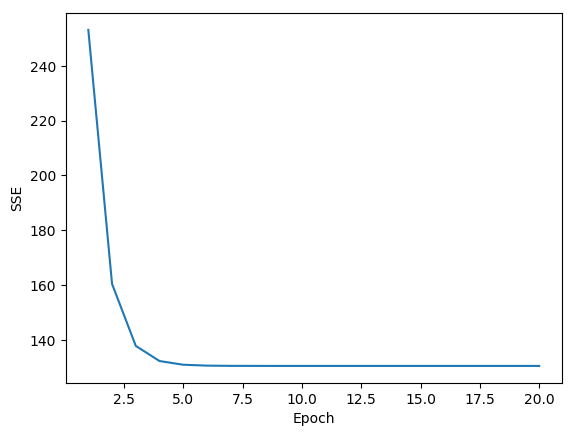

In [46]:
sns.reset_orig()
plt.plot(range(1,lr.n_iter+1), lr.costFunction)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.show()

In [47]:
def linRegplot(X, y, model):
    plt.scatter(X, y, c="steelBlue", edgecolors="white", s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

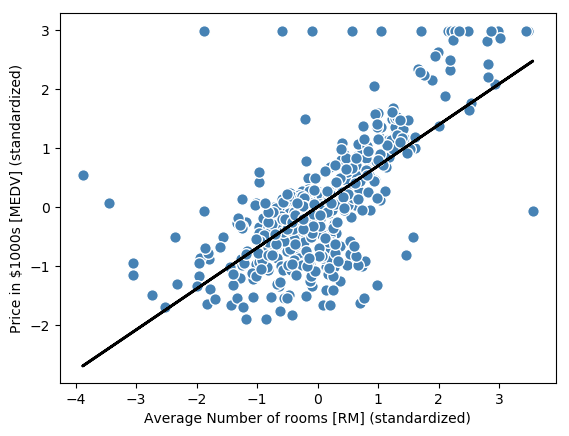

In [48]:
linRegplot(xStd, yStd, lr)
plt.xlabel('Average Number of rooms [RM] (standardized)')
plt.ylabel("Price in $1000s [MEDV] (standardized)")
plt.show()

In [50]:
numRoomStd = scX.transform([[5.0]])
priceStd = lr.predict(numRoomStd)
print("Price in $1000s: %.3f" % scY.inverse_transform(priceStd))

Price in $1000s: 10.840


In [51]:
print("Slope: %.2f" % lr.w2[1])
print("Intercept: %.3f" % lr.w2[0])

Slope: 0.70
Intercept: -0.000


### 通过sklearn估计回归模型的系数

In [52]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print("Slope: %.2f" % slr.coef_[0])
print("Intercept: %.3f" % slr.intercept_)

Slope: 9.10
Intercept: -34.671


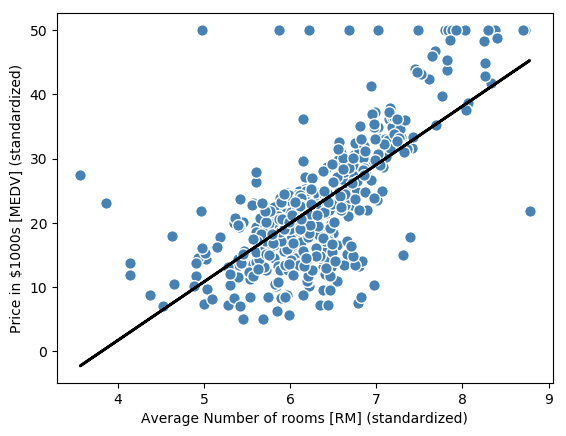

In [53]:
linRegplot(X, y, slr)
plt.xlabel('Average Number of rooms [RM] (standardized)')
plt.ylabel("Price in $1000s [MEDV] (standardized)")
plt.show()

### 用封闭形态的OLS的解决方案（求最小二乘的相容解）

In [60]:
#  x.T * x * w = x.T * y -----> w = (x.T * x)-1 * x.T * y
xb = np.hstack((np.ones((X.shape[0], 1)), X)) # 添加常数项,xb相当于x
#w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(xb.T, xb)) # (x.T * x)-1 
w = np.dot(z, np.dot(xb.T, y)) # (x.T * x)-1 * x.T * y
print("Slope: %.2f" % w[1])
print("Intercept: %.3f" % w[0])

Slope: 9.10
Intercept: -34.671


In [59]:
w

array([[-34.67062078],
       [  9.10210898]])

In [56]:
w

array([[-34.67062078],
       [  9.10210898]])